In [1]:
from pathlib import Path

base_dir = Path('../../local/out/elpp/')

In [2]:
import pandas as pd

df = pd.read_feather(base_dir / 'exp3_emb_size_1_hidden_size_16.feather')
tmp = df.apply(lambda x:x['Axiom'], result_type='expand', axis=1)
df = pd.merge(df, tmp, left_index=True, right_index=True).rename(columns={0: 'Operator', 1: 'Subclass', 2: 'Superclass'})
df

,Complexity threshold j,Complexity threshold k,KB,Complexity,Axiom,Expected,Predicted,Raw predicted,Operator,Subclass,Superclass
0,2,2,0,9,"[0, 4, 53]",1,0,0.495671,0,4,53
1,2,2,0,3,"[0, 7, 53]",1,0,0.428924,0,7,53
2,2,2,0,8,"[0, 9, 0]",1,0,0.287147,0,9,0
3,2,2,0,10,"[0, 9, 46]",1,0,0.321483,0,9,46
4,2,2,0,7,"[0, 9, 53]",1,0,0.427328,0,9,53
...,...,...,...,...,...,...,...,...,...,...,...
5909147,20,20,17,22,"[0, 96, 66]",1,1,0.733488,0,96,66
5909148,20,20,17,23,"[0, 98, 5]",1,1,0.639197,0,98,5
5909149,20,20,17,21,"[0, 98, 10]",1,1,0.614918,0,98,10
5909150,20,20,17,22,"[0, 98, 48]",1,0,0.251317,0,98,48


## Reasoner training complexity (j) and embeddings training complexity (k) vs recall on the test set >k

In [3]:
df[['Complexity threshold j', 'Complexity threshold k', 'Predicted']].groupby(['Complexity threshold j', 'Complexity threshold k']).mean().reset_index().pivot(index='Complexity threshold j', columns='Complexity threshold k', values='Predicted')

Complexity threshold k,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Complexity threshold j,,,,,,,,,,,,,,,,,,,
2,0.382028,0.420540,0.458017,0.477656,0.508650,0.535421,0.569438,0.603030,0.610473,0.626617,0.646151,0.649967,0.655633,0.666910,0.674837,0.673880,0.674190,0.688252,0.690296
3,0.416014,0.451835,0.486278,0.502731,0.534167,0.562066,0.593135,0.627348,0.629736,0.647401,0.668305,0.673543,0.676209,0.685781,0.689854,0.689121,0.687909,0.704694,0.704474
4,0.442393,0.479021,0.514250,0.529196,0.560041,0.588764,0.618947,0.648591,0.652517,0.667166,0.687971,0.695612,0.694928,0.703408,0.709150,0.706804,0.706054,0.723523,0.722196
5,0.471486,0.507593,0.542798,0.557100,0.584690,0.615409,0.645247,0.671623,0.676913,0.688009,0.708009,0.713098,0.712959,0.719061,0.725568,0.725581,0.728270,0.742261,0.742504
6,0.458363,0.495223,0.529748,0.545929,0.574177,0.603637,0.635215,0.661896,0.666820,0.680522,0.700106,0.707138,0.705113,0.712990,0.718799,0.717666,0.719154,0.735464,0.735607
7,0.471041,0.508701,0.543134,0.558540,0.586884,0.615251,0.646332,0.671232,0.676971,0.688728,0.707387,0.711133,0.713991,0.718768,0.726035,0.728023,0.730660,0.743364,0.745378
8,0.474288,0.514193,0.548556,0.565988,0.592294,0.619350,0.650561,0.675425,0.680777,0.691243,0.708943,0.714145,0.716537,0.720963,0.728214,0.731223,0.736237,0.745293,0.747677
9,0.479804,0.518348,0.552298,0.569563,0.595560,0.622766,0.653923,0.677717,0.683430,0.695077,0.713548,0.717223,0.719083,0.724620,0.731015,0.733665,0.738449,0.747313,0.749689
10,0.488390,0.527256,0.562134,0.579444,0.604695,0.631806,0.660051,0.682077,0.689082,0.700287,0.715041,0.717747,0.723901,0.728789,0.736383,0.738717,0.746946,0.749518,0.755532


## Reasoner training complexity (j) and embeddings training complexity (k) vs recall on the test set >20


In [4]:
summary = df.pivot(index=['KB', 'Operator', 'Subclass', 'Superclass'], columns=['Complexity threshold k', 'Complexity threshold j'], values='Predicted').dropna().mean(axis=0).reset_index().pivot(index='Complexity threshold j', columns='Complexity threshold k', values=0)
summary

Complexity threshold k,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Complexity threshold j,,,,,,,,,,,,,,,,,,,
2,0.364499,0.400038,0.429447,0.447936,0.475429,0.503784,0.530606,0.556950,0.558483,0.575438,0.598046,0.603314,0.613277,0.637992,0.650733,0.659450,0.663952,0.683495,0.690296
3,0.397452,0.431363,0.457036,0.473513,0.501964,0.532043,0.556950,0.581569,0.579270,0.596034,0.621611,0.626209,0.635214,0.659259,0.667593,0.675065,0.677938,0.700163,0.704474
4,0.430884,0.461538,0.490756,0.506562,0.532810,0.564709,0.587317,0.607913,0.606859,0.620845,0.644506,0.653798,0.658588,0.680238,0.690009,0.694607,0.696906,0.719513,0.722196
5,0.469298,0.495162,0.526583,0.541527,0.565859,0.596034,0.617684,0.635980,0.637609,0.647572,0.669604,0.676118,0.679184,0.697768,0.708210,0.715107,0.719992,0.738289,0.742504
6,0.452630,0.479644,0.510968,0.527541,0.551585,0.581378,0.605709,0.623719,0.625347,0.637705,0.659259,0.668455,0.670371,0.691062,0.700738,0.706581,0.710317,0.731392,0.735607
7,0.470064,0.497461,0.526966,0.544976,0.568158,0.596417,0.619216,0.636364,0.638471,0.648242,0.669892,0.674969,0.680142,0.697385,0.708305,0.717023,0.722483,0.739247,0.745378
8,0.474183,0.505987,0.533768,0.554172,0.574289,0.601494,0.624964,0.642303,0.645081,0.653128,0.672382,0.679184,0.683399,0.700067,0.710700,0.720088,0.728326,0.741067,0.747677
9,0.481272,0.509340,0.538174,0.558962,0.577354,0.606093,0.628317,0.644506,0.647763,0.656959,0.677172,0.682345,0.685889,0.704282,0.714245,0.722866,0.730530,0.743175,0.749689
10,0.492959,0.522943,0.554747,0.571319,0.588466,0.616055,0.637034,0.652457,0.655714,0.665868,0.679375,0.684261,0.693074,0.708018,0.719130,0.727656,0.739630,0.745282,0.755532


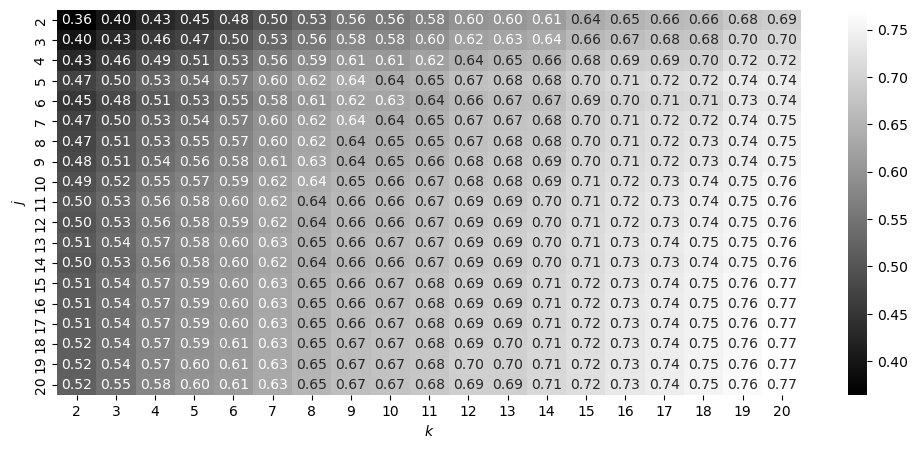

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.heatmap(summary, annot=True, fmt=".2f", cmap='gist_gray')
ax.set_xlabel('$k$')
ax.set_ylabel('$j$')
plt.savefig(base_dir / 'exp3.pdf', dpi=300)

# KB = dataset, (j, k) = classifier

This results in $19^2\cdot (19^2-1)/2=64,980$ comparisons. Assuming family-wise error rate $0.05$ and the Bonferroni correction, the significance level would be $0.05/64980=7.69\cdot 10^{-7}$ and that clearly makes no sense whatsoever.


In [6]:
summary = df.pivot(index=['KB', 'Operator', 'Subclass', 'Superclass'], columns=['Complexity threshold j', 'Complexity threshold k'], values='Predicted').dropna().reset_index().drop(columns=['Operator', 'Subclass', 'Superclass']).groupby('KB').mean()
summary.columns = summary.columns.to_flat_index()
summary

/tmp/ipykernel_5763/433819153.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  summary = df.pivot(index=['KB', 'Operator', 'Subclass', 'Superclass'], columns=['Complexity threshold j', 'Complexity threshold k'], values='Predicted').dropna().reset_index().drop(columns=['Operator', 'Subclass', 'Superclass']).groupby('KB').mean()


,"(2, 2)","(2, 3)","(2, 4)","(2, 5)","(2, 6)","(2, 7)","(2, 8)","(2, 9)","(2, 10)","(2, 11)",...,"(20, 11)","(20, 12)","(20, 13)","(20, 14)","(20, 15)","(20, 16)","(20, 17)","(20, 18)","(20, 19)","(20, 20)"
KB,,,,,,,,,,,,,,,,,,,,,
0,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,...,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.336207,0.327586,0.293103,0.250000,0.258621,0.284483,0.353448,0.396552,0.336207,0.387931,...,0.560345,0.534483,0.534483,0.543103,0.491379,0.551724,0.603448,0.560345,0.629310,0.663793
2,0.301955,0.325851,0.332368,0.338885,0.341781,0.365677,0.417813,0.393917,0.400434,0.392469,...,0.596669,0.648081,0.614048,0.593773,0.612600,0.614772,0.618392,0.654598,0.624909,0.632151
3,0.130909,0.145455,0.141818,0.145455,0.178182,0.225455,0.185455,0.192727,0.178182,0.167273,...,0.440000,0.425455,0.498182,0.483636,0.461818,0.498182,0.487273,0.520000,0.523636,0.589091
4,0.241379,0.258621,0.224138,0.258621,0.275862,0.327586,0.413793,0.344828,0.379310,0.431034,...,0.500000,0.534483,0.465517,0.586207,0.517241,0.517241,0.465517,0.448276,0.517241,0.568966
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.000000,...,0.052632,0.000000,0.000000,0.157895,0.105263,0.157895,0.157895,0.052632,0.315789,0.368421
8,0.150000,0.200000,0.250000,0.100000,0.100000,0.050000,0.100000,0.100000,0.200000,0.150000,...,0.500000,0.550000,0.500000,0.500000,0.500000,0.650000,0.550000,0.650000,0.650000,0.550000
9,0.252212,0.303835,0.404130,0.433628,0.446903,0.522124,0.601770,0.663717,0.674041,0.730088,...,0.744838,0.713864,0.744838,0.735988,0.746313,0.793510,0.799410,0.815634,0.805310,0.824484


In [7]:
from scipy.stats import friedmanchisquare

friedmanchisquare(*summary.to_numpy())


FriedmanchisquareResult(statistic=4898.0384844574155, pvalue=0.0)

In [8]:
import scikit_posthocs as sp

sp.posthoc_nemenyi_friedman(summary, melted=False) #.to_numpy())

,"(2, 2)","(2, 3)","(2, 4)","(2, 5)","(2, 6)","(2, 7)","(2, 8)","(2, 9)","(2, 10)","(2, 11)",...,"(20, 11)","(20, 12)","(20, 13)","(20, 14)","(20, 15)","(20, 16)","(20, 17)","(20, 18)","(20, 19)","(20, 20)"
"(2, 2)",1.000,0.900,0.900,0.900,0.900,0.900,0.900,0.900,0.900,0.900,...,0.001000,0.001000,0.002396,0.001,0.001,0.001,0.001,0.001,0.001,0.001
"(2, 3)",0.900,1.000,0.900,0.900,0.900,0.900,0.900,0.900,0.900,0.900,...,0.001000,0.001000,0.002963,0.001,0.001,0.001,0.001,0.001,0.001,0.001
"(2, 4)",0.900,0.900,1.000,0.900,0.900,0.900,0.900,0.900,0.900,0.900,...,0.005187,0.001176,0.015828,0.001,0.001,0.001,0.001,0.001,0.001,0.001
"(2, 5)",0.900,0.900,0.900,1.000,0.900,0.900,0.900,0.900,0.900,0.900,...,0.005695,0.001292,0.017247,0.001,0.001,0.001,0.001,0.001,0.001,0.001
"(2, 6)",0.900,0.900,0.900,0.900,1.000,0.900,0.900,0.900,0.900,0.900,...,0.019415,0.004759,0.052541,0.001,0.001,0.001,0.001,0.001,0.001,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(20, 16)",0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.900000,0.900000,0.900000,0.900,0.900,1.000,0.900,0.900,0.900,0.900
"(20, 17)",0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.900000,0.900000,0.900000,0.900,0.900,0.900,1.000,0.900,0.900,0.900
"(20, 18)",0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.900000,0.900000,0.900000,0.900,0.900,0.900,0.900,1.000,0.900,0.900
"(20, 19)",0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.900000,0.900000,0.900000,0.900,0.900,0.900,0.900,0.900,1.000,0.900
